In [1]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import metrics

1. IMPORT DATASET

In [2]:
#a/ Load the data set
df = pd.read_excel("Data_AIL.xlsx")
df.head()

,e,no. video,Student ID,Full name,id,standardized dish,dish occurence (based on transcript),dish imply,start time,end time,...,sauce (based on transcript),venue,container,describe how to make it,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,location,foreigner,Unnamed: 24
0,1.0,51.0,NaN,NaN,5OzrpNCyXqs,snail vermicelli soup,bun oc,NaN,1:05,3:21,...,NaN,street restaurant,bowl,1.0,4.0,NaN,5.0,HN,1.0,NaN
1,2.0,51.0,NaN,NaN,5OzrpNCyXqs,vermicelli with fried tofu and shrimp paste,bun dau mam tom,NaN,3:32,6:10,...,"fish sauce, fermented shrimp paste, pepper, ch...",street restaurant,tray,1.0,4.0,NaN,4.0,HN,1.0,NaN
2,3.0,51.0,NaN,NaN,5OzrpNCyXqs,fried spring roll,spring roll,NaN,5:23,6:10,...,"fish sauce, sweet spicy garlic sauce",street restaurant,plate,0.0,5.0,NaN,5.0,HN,1.0,NaN
3,4.0,51.0,NaN,NaN,5OzrpNCyXqs,steamed rolled rice pancake,banh cuon,NaN,6:22,9:23,...,"garlic water, fried caramelized scallion, pepp...",street restaurant,plate,1.0,5.0,NaN,5.0,HN,1.0,NaN
4,5.0,51.0,NaN,NaN,5OzrpNCyXqs,shrimp cake,shrimp cake,NaN,9:42,11:55,...,"chili, sweet spicy sauce",street restaurant,plate,1.0,4.0,NaN,5.0,HN,1.0,NaN


In [3]:
new_feature = "container"
new_feature2 = "venue"
new_feature3 = "location"

In [4]:
#b/ Select features
data = df[["start time","end time","Unnamed: 11",new_feature, new_feature2,new_feature3,"viewer feeling of youtuber's style ","viewer feeling of presented food","YouTuber feeling"]]

In [5]:
data= data.dropna(axis= 0)
data.describe()

,Unnamed: 11
count,2711.000000
mean,3.183327
std,2.622489
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,20.000000


In [6]:
#convert categorize collumns to numbers
le = LabelEncoder()
data[new_feature] = le.fit_transform(data[new_feature])
data[new_feature2] = le.fit_transform(data[new_feature2])
data[new_feature3] = le.fit_transform(data[new_feature3])

In [7]:
data.head()

,start time,end time,Unnamed: 11,container,venue,location,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling
805,0:48,2:08,5,7,5,67,4.0,4.0,4.0
806,2:45,3:20,4,4,5,67,3.0,4.0,3.0
807,4:09,4:30,3,7,5,67,3.0,4.0,4.0
808,0:26,0:40,3,9,1,123,2.0,2.0,4.0
809,0:58,1:33,3,9,5,123,3.0,2.0,4.0


In [8]:
# convert start time and end time to seconds
import re
def __check_value_time(hours=0, minutes=0, seconds=0):
    # print('Time out: 'hours, minutes, seconds)
    if hours > 24:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Hour is out of range')

    if seconds > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Second is out of range')

    if minutes > 60:
        print('Time error: ',hours, minutes, seconds)
        raise ValueError('Minutes is out of range')

def process_time_str(time_str):
    time_data = re.findall('[0-9]?[0-9]', time_str)
    TIME_WITH_HOUR = 3
    TIME_WITH_MINUTES = 2
    TIME_WITH_SECONDS = 1
    MAX_SECONDS = 90060
    # print(time_data)
    if len(time_data) == TIME_WITH_HOUR:
        hours = int(time_data[0])
        minutes = int(time_data[1])
        seconds = int(time_data[2])

        __check_value_time(hours, seconds, minutes)

        return (hours*3600 + minutes*60 + seconds)
    if len(time_data) == TIME_WITH_MINUTES:
        minutes = int(time_data[0])
        seconds = int(time_data[1])

        __check_value_time(minutes=minutes, seconds=seconds)

        return (minutes*60 + seconds)
    if len(time_data) == TIME_WITH_SECONDS:
        seconds = int(time_data[0])

        __check_value_time(seconds=seconds)

        return seconds

In [9]:
index_data = list()
for str_time in data['start time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)

data = data[index_data]

index_data = list()
for str_time in data['end time']:
    if str_time[0].isdigit() and str_time[-1].isdigit():
        index_data.append(True)
    else:
        index_data.append(False)
data = data[index_data]
df_time = list()

for start_time, end_time in zip(data['start time'], data['end time']):
    df_time.append((process_time_str(start_time), process_time_str(end_time)))

data[['start time', 'end time']] = df_time
data["viewer feeling of youtuber's style "] = data["viewer feeling of youtuber's style "].astype('int')


In [10]:
data['duration'] = data['end time']- data['start time']

In [11]:
data= data.loc[data['duration']>=0]
data = data.loc[data["viewer feeling of youtuber's style "]!=0]
data.head()

,start time,end time,Unnamed: 11,container,venue,location,viewer feeling of youtuber's style,viewer feeling of presented food,YouTuber feeling,duration
805,48,128,5,7,5,67,4,4.0,4.0,80
806,165,200,4,4,5,67,3,4.0,3.0,35
807,249,270,3,7,5,67,3,4.0,4.0,21
808,26,40,3,9,1,123,2,2.0,4.0,14
809,58,93,3,9,5,123,3,2.0,4.0,35


<AxesSubplot:title={'center':'Weight of class'}, ylabel='duration'>

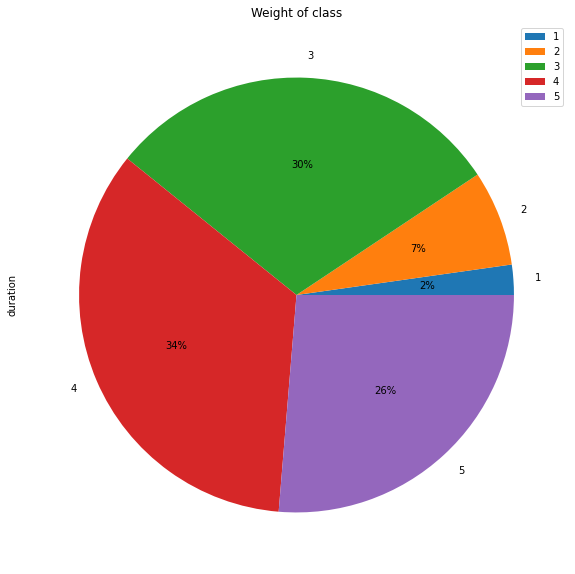

In [12]:
# Plotting the pie chart for above dataframe
data.groupby(["viewer feeling of youtuber's style "]).count().plot(kind='pie',y = "duration", autopct='%1.0f%%',figsize=(15,10), title= "Weight of class")

In [13]:

# Phân loại 
input_data = data[['duration',"Unnamed: 11",new_feature, new_feature2,new_feature3,"viewer feeling of presented food","YouTuber feeling"]]

target_data = data["viewer feeling of youtuber's style "]
x = input_data.to_numpy()
y = target_data.to_numpy()

In [14]:
input_data.head()

,duration,Unnamed: 11,container,venue,location,viewer feeling of presented food,YouTuber feeling
805,80,5,7,5,67,4.0,4.0
806,35,4,4,5,67,4.0,3.0
807,21,3,7,5,67,4.0,4.0
808,14,3,9,1,123,2.0,4.0
809,35,3,9,5,123,2.0,4.0


3. K_mean

In [15]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

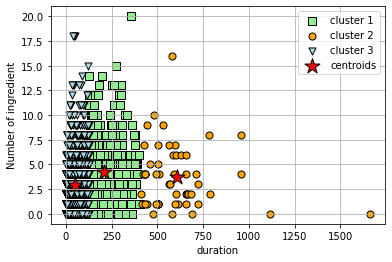

In [16]:
# plot the 5 clusters
plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0],  x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0],  x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel("duration")
plt.ylabel("Number of ingredient")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

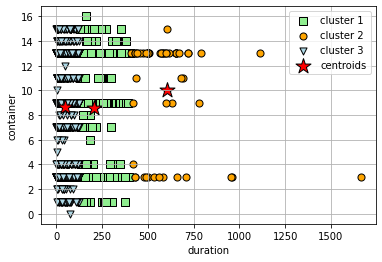

In [17]:
# plot the 5 clusters
plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 2],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0],  x[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0],  x[y_km == 2, 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 2],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.xlabel("duration")
plt.ylabel("container")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Text(0.5, 0, 'container')

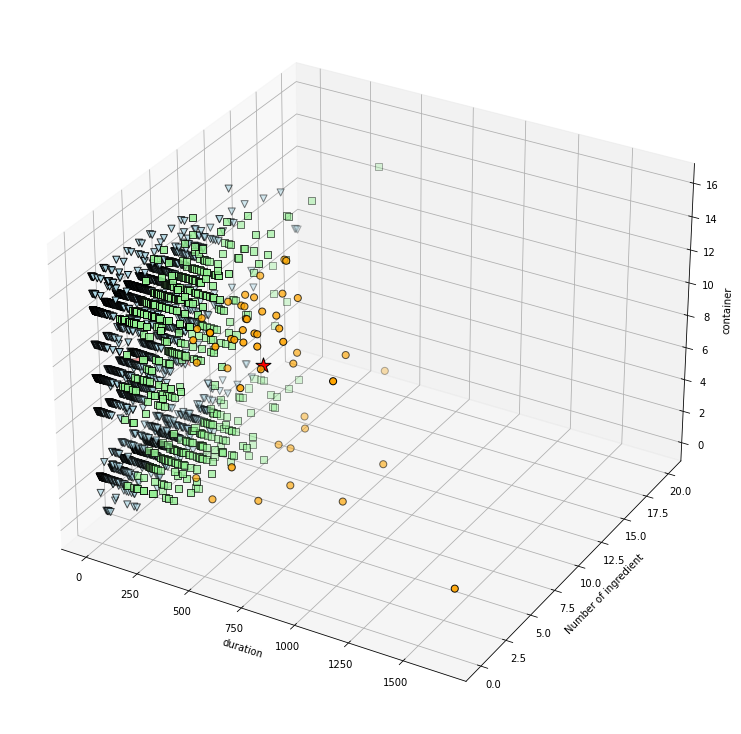

In [18]:
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D

# plot the 5 clusters
fig = plt.figure(figsize = (20, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1], x[y_km == 0, 2],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    x[y_km == 1, 0],  x[y_km == 1, 1], x[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    x[y_km == 2, 0],  x[y_km == 2, 1], x[y_km == 2, 2],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
ax.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
ax.set_xlabel("duration")
ax.set_ylabel("Number of ingredient")
ax.set_zlabel("container")



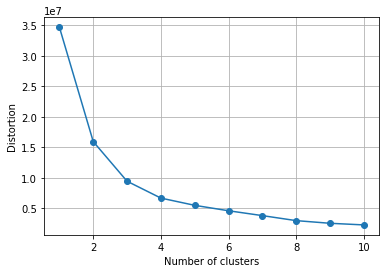

In [19]:
#Using elbow method to choose optimal number of cluster
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km2 = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km2.fit(x)
    distortions.append(km2.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.show()

4.PCA

In [20]:
# Normalization
for column in input_data:
    input_data[column] = (input_data[column]-input_data[column].mean())/(input_data[column].max()- input_data[column].min())

C:\Users\Admin\AppData\Local\Temp\ipykernel_17512\1739691972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[column] = (input_data[column]-input_data[column].mean())/(input_data[column].max()- input_data[column].min())


In [21]:
# Normalization
input_data.head()

,duration,Unnamed: 11,container,venue,location,viewer feeling of presented food,YouTuber feeling
805,-0.006939,0.090583,-0.103326,0.420852,0.171362,0.022982,-0.065863
806,-0.034015,0.040583,-0.290826,0.420852,0.171362,0.022982,-0.315863
807,-0.042439,-0.009417,-0.103326,0.420852,0.171362,0.022982,-0.065863
808,-0.046650,-0.009417,0.021674,-0.379148,0.622975,-0.477018,-0.065863
809,-0.034015,-0.009417,0.021674,0.420852,0.622975,-0.477018,-0.065863


In [22]:
X = input_data.to_numpy()

In [23]:
from sklearn.decomposition import PCA
pca_7 = PCA(n_components=7)
pca_7.fit(X)
X_pca_7 = pca_7.transform(X)


In [32]:
print(X_pca_7.shape)
pca_7.explained_variance_ratio_*100

(2676, 7)


array([36.4015632 , 19.84704107, 18.73305175, 14.19535659,  5.61820666,
        4.15996844,  1.04481228])

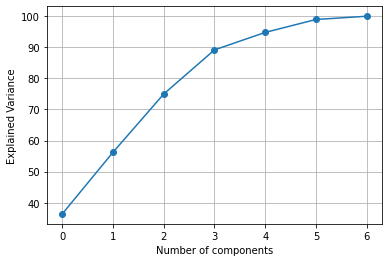

In [25]:
plt.plot(np.cumsum(pca_7.explained_variance_ratio_*100),marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

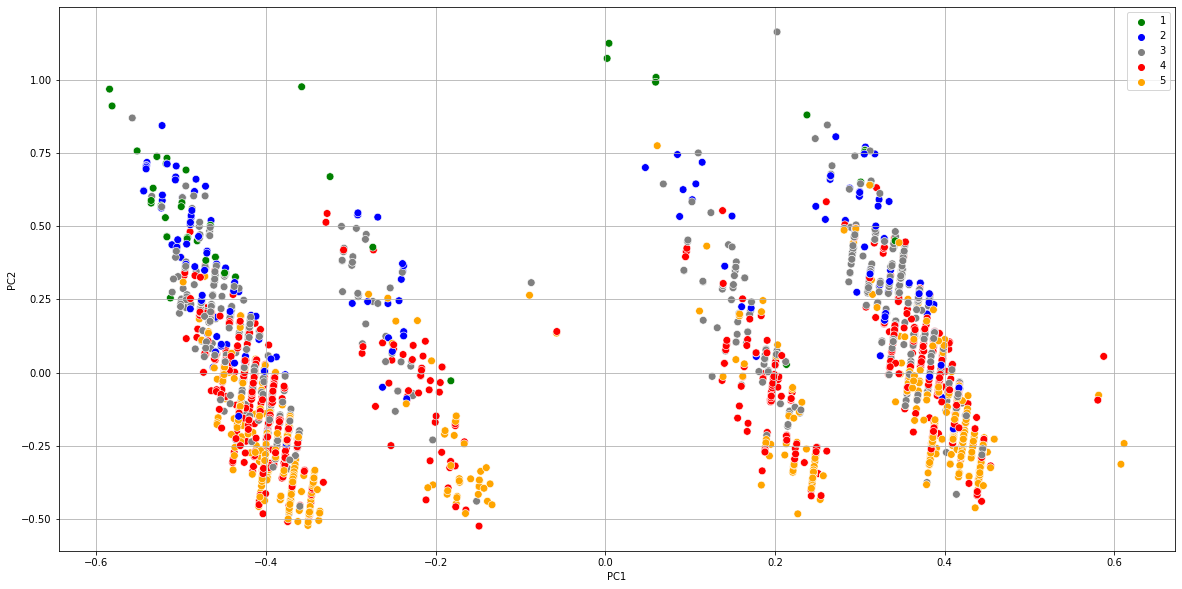

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X_pca_7[:,0], y = X_pca_7[:,1], s=60, hue= y, palette=['green','blue','gray','red','orange'])
plt.title("",pad = 15)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [27]:
pca_80 = PCA(n_components=0.8)
pca_80.fit(X)
X_pca_80 = pca_80.transform(X)

In [28]:
X_pca_80.shape

(2676, 4)

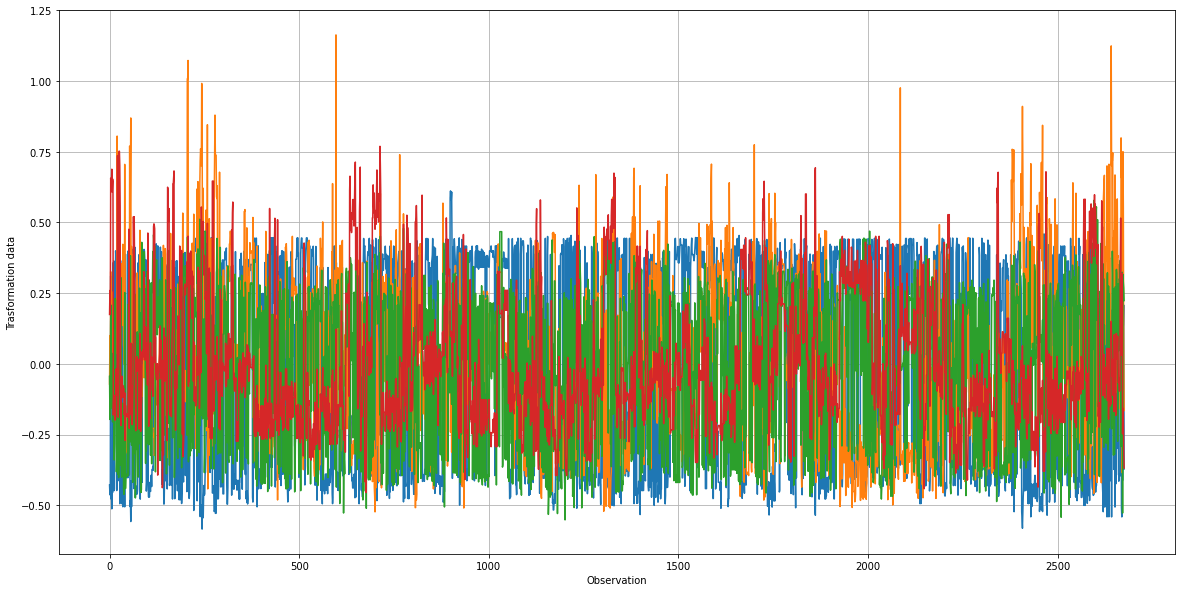

In [29]:
plt.figure(figsize=(20,10))
plt.plot(X_pca_80)
plt.xlabel("Observation")
plt.ylabel("Trasformation data")
plt.grid()
plt.show()

In [30]:
df_new = pd.DataFrame(X_pca_80, columns =["PC1",'PC2','PC3','PC4'])
df_new['label']=y
df_new.head()

,PC1,PC2,PC3,PC4,label
0,-0.428745,-0.071508,-0.044559,0.174634,4
1,-0.463395,0.099858,-0.196758,0.259334,3
2,-0.428171,-0.059119,-0.036947,0.174477,3
3,0.310848,0.326042,0.150755,0.657002,2
4,-0.478288,0.215663,0.207418,0.618497,3
